# ML Final Project -- Predict CO2 Emissions in Rwanda

## Overview

The ability to accurately monitor carbon emissions is a critical step in the fight against climate change. Precise carbon readings allow researchers and governments to understand the sources and patterns of carbon mass output. While Europe and North America have extensive systems in place to monitor carbon emissions on the ground, there are few available in Africa.

This project uses the data provided in the **Predict CO2 Emissions in Rwanda** challenge from Kaggle. It's main objective is to create a machine learning model using open-source CO2 emissions data from Sentinel-5P satellite observations to predict future carbon emissions.

## Dataset Description

Seven main features were extracted weekly from the satellite Sentinel-5 Percursor from January 2019 to November 2022. Each feature contains sub features such as column_number_density which is the vertical column density at ground level.  You are given the values of these features in the test set and your goal to predict CO2 emissions using time information as well as these features.

This main seven features are: 

1. **Sulfur Dioxide (SO2):** Sulfur dioxide is a gas released when fossil fuels containing sulfur, like coal and oil, are burned. It can contribute to CO2 emissions indirectly because it's often associated with the same activities, like power generation and industrial processes. SO2 can also lead to the formation of acid rain, which harms the environment.

2. **Carbon Monoxide (CO):** Carbon monoxide is a colorless, odorless gas produced when fuels don't burn completely. While not a greenhouse gas like CO2, it indirectly relates to CO2 emissions because it's a sign of inefficient combustion in vehicles and machinery. This inefficiency can result in higher CO2 emissions as well.

3. **Nitrogen Dioxide (NO2):** Nitrogen dioxide is a gas formed during combustion processes, such as in vehicles and power plants. It contributes to CO2 emissions because its presence often signifies the burning of fossil fuels. NO2 is also a harmful air pollutant that can have negative health effects.

4. **Formaldehyde (CH2O):** Formaldehyde is a chemical compound found in vehicle emissions and some industrial processes. It's not directly related to CO2 emissions but is considered a harmful air pollutant. Reducing formaldehyde emissions can be part of broader efforts to improve air quality and mitigate climate change.

5. **UV Aerosol Index:** The UV aerosol index measures the presence of tiny particles, or aerosols, in the atmosphere. While not directly linked to CO2 emissions, aerosols can indirectly influence climate change. Some aerosols can reflect sunlight back into space, which can have a cooling effect on the planet, counteracting the warming caused by CO2.

6. **Ozone (O3):** Ground-level ozone, also known as smog, forms when pollutants from vehicles and industrial sources react with sunlight. Ozone is not a direct CO2 emission, but it contributes to air pollution and can indirectly affect climate change. It also has health implications for humans and the environment.

7. **Cloud:** Clouds play a complex role in climate change. They can both cool and warm the Earth. While not directly connected to CO2 emissions, understanding cloud behavior is crucial for climate scientists because clouds can either trap heat in the atmosphere (warming effect) or reflect sunlight away (cooling effect), impacting the overall climate system.


Approximately 497 unique locations were selected from multiple areas in Rwanda, with a distribution around farm lands, cities and power plants. The data is split by time; the years 2019 - 2021 are included in the training data, our task is to predict the CO2 emissions data for 2022 through November.

---

## Exploratory Data Analysis

### Libraries and Data Loading

In [2]:
# Libraries for handling data and processing numbers

import pandas as pd
import numpy as np

# Libraries for plotting
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

# To ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Join the two datasets to perform the EDA

train_data = pd.read_csv('/workspaces/julio-segura-final-project-ml/data/raw/train.csv')
test_data = pd.read_csv('/workspaces/julio-segura-final-project-ml/data/raw/test.csv')

full_data = pd.concat([train_data, test_data])

full_data.head(5)


ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 76 columns]

In [4]:
# Number of rows and columns in the dataframe

full_data.shape

(103376, 76)

There are 103376 observations and 76 rows.

In [5]:
# Type of data in the dataframe

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103376 entries, 0 to 24352
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   ID_LAT_LON_YEAR_WEEK                                      103376 non-null  object 
 1   latitude                                                  103376 non-null  float64
 2   longitude                                                 103376 non-null  float64
 3   year                                                      103376 non-null  int64  
 4   week_no                                                   103376 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  82625 non-null   float64
 6   SulphurDioxide_SO2_column_number_density_amf              82625 non-null   float64
 7   SulphurDioxide_SO2_slant_column_number_density            82625 non-null   float64
 8   SulphurDio

The dataframe contains 76 rows, and almost all of them are of the float64 datatype. 

---

## Data Cleaning

### Duplicated Values

In [6]:
duplicates = full_data.duplicated()

duplicates.sum()

0

There are no duplicated values in the dataframe.

### Missing Values

In [7]:
total_na = full_data.isnull().sum().sort_values(ascending=False)

print(total_na)

UvAerosolLayerHeight_aerosol_height          100844
UvAerosolLayerHeight_sensor_zenith_angle     100844
UvAerosolLayerHeight_solar_zenith_angle      100844
UvAerosolLayerHeight_solar_azimuth_angle     100844
UvAerosolLayerHeight_sensor_azimuth_angle    100844
                                              ...  
longitude                                         0
year                                              0
week_no                                           0
latitude                                          0
ID_LAT_LON_YEAR_WEEK                              0
Length: 76, dtype: int64


In [8]:
percent_1 = full_data.isnull().sum()/full_data.isnull().count()*100

print(percent_1)

ID_LAT_LON_YEAR_WEEK           0.000000
latitude                       0.000000
longitude                      0.000000
year                           0.000000
week_no                        0.000000
                                ...    
Cloud_sensor_azimuth_angle     0.628773
Cloud_sensor_zenith_angle      0.628773
Cloud_solar_azimuth_angle      0.628773
Cloud_solar_zenith_angle       0.628773
emission                      23.557692
Length: 76, dtype: float64


In [9]:
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

print(percent_2)

UvAerosolLayerHeight_aerosol_height          97.6
UvAerosolLayerHeight_sensor_zenith_angle     97.6
UvAerosolLayerHeight_solar_zenith_angle      97.6
UvAerosolLayerHeight_solar_azimuth_angle     97.6
UvAerosolLayerHeight_sensor_azimuth_angle    97.6
                                             ... 
longitude                                     0.0
year                                          0.0
week_no                                       0.0
latitude                                      0.0
ID_LAT_LON_YEAR_WEEK                          0.0
Length: 76, dtype: float64


There are way too many missing values in the UvAerosolLayerHeight subfeatures. We'll delete them enterely from the dataframe.

In [10]:
full_data.drop(['UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_solar_azimuth_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_aerosol_optical_depth'], axis = 1, inplace = True)

In [11]:
total_na = full_data.isnull().sum().sort_values(ascending=False)

print(total_na)

emission                                           24353
NitrogenDioxide_sensor_altitude                    23975
NitrogenDioxide_absorbing_aerosol_index            23975
NitrogenDioxide_tropopause_pressure                23975
NitrogenDioxide_NO2_slant_column_number_density    23975
                                                   ...  
latitude                                               0
week_no                                                0
year                                                   0
longitude                                              0
ID_LAT_LON_YEAR_WEEK                                   0
Length: 69, dtype: int64


In [12]:
# Delete 'ID_LAT_LON_YEAR_WEEK' as it will give us problems later

full_data.drop(['ID_LAT_LON_YEAR_WEEK'], axis = 1, inplace = True)

In [13]:
# Fill the NaN values with the median of the column 

full_data = full_data.fillna(full_data.median())

---

## Descriptive Analysis and Visualization

### Observation of Descriptive Measures

In [14]:
describe = ['SulphurDioxide_SO2_column_number_density', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Ozone_O3_column_number_density', 'SulphurDioxide_cloud_fraction', 'NitrogenDioxide_cloud_fraction', 'Formaldehyde_cloud_fraction' ,'Ozone_cloud_fraction', 'Cloud_cloud_fraction']
data_description = train_data[describe]

data_description.describe()

SulphurDioxide_SO2_column_number_density  \
count                              64414.000000   
mean                                   0.000048   
std                                    0.000272   
min                                   -0.000996   
25%                                   -0.000096   
50%                                    0.000024   
75%                                    0.000153   
max                                    0.004191   

       CarbonMonoxide_CO_column_number_density  \
count                             76901.000000   
mean                                  0.033158   
std                                   0.006023   
min                                   0.015793   
25%                                   0.029064   
50%                                   0.032253   
75%                                   0.036022   
max                                   0.072990   

       CarbonMonoxide_H2O_column_number_density  \
count                              76901.000000   
mean                                2113.906233   
std                                  619.561233   
min                                  276.370929   
25%                                 1698.455138   
50%                                 2035.418030   
75%                                 2421.942057   
max                                 9193.168945   

       NitrogenDioxide_NO2_column_number_density  \
count                               60703.000000   
mean                                    0.000044   
std                                     0.000010   
min                                    -0.000013   
25%                                     0.000038   
50%                                     0.000044   
75%                                     0.000050   
max                                     0.000217   

       NitrogenDioxide_tropospheric_NO2_column_number_density  \
count                                       60703.000000        
mean                                            0.000012        
std                                             0.000008        
min                                            -0.000028        
25%                                             0.000007        
50%                                             0.000012        
75%                                             0.000017        
max                                             0.000173        

       NitrogenDioxide_stratospheric_NO2_column_number_density  \
count                                       60703.000000         
mean                                            0.000032         
std                                             0.000004         
min                                             0.000022         
25%                                             0.000029         
50%                                             0.000031         
75%                                             0.000035         
max                                             0.000045         

       Formaldehyde_tropospheric_HCHO_column_number_density  \
count                                       71746.000000      
mean                                            0.000127      
std                                             0.000091      
min                                            -0.000445      
25%                                             0.000072      
50%                                             0.000123      
75%                                             0.000179      
max                                             0.001174      

       Ozone_O3_column_number_density  SulphurDioxide_cloud_fraction  \
count                    78475.000000                   64414.000000   
mean                         0.117343                       0.158418   
std                          0.003217                       0.071364   
min                          0.106192                       0.000000   
25%                          0.115793                     

### Column Number Density Visualization

The number density is an intensive quantity used to describe the degree of concentration of countable objects in physical space.

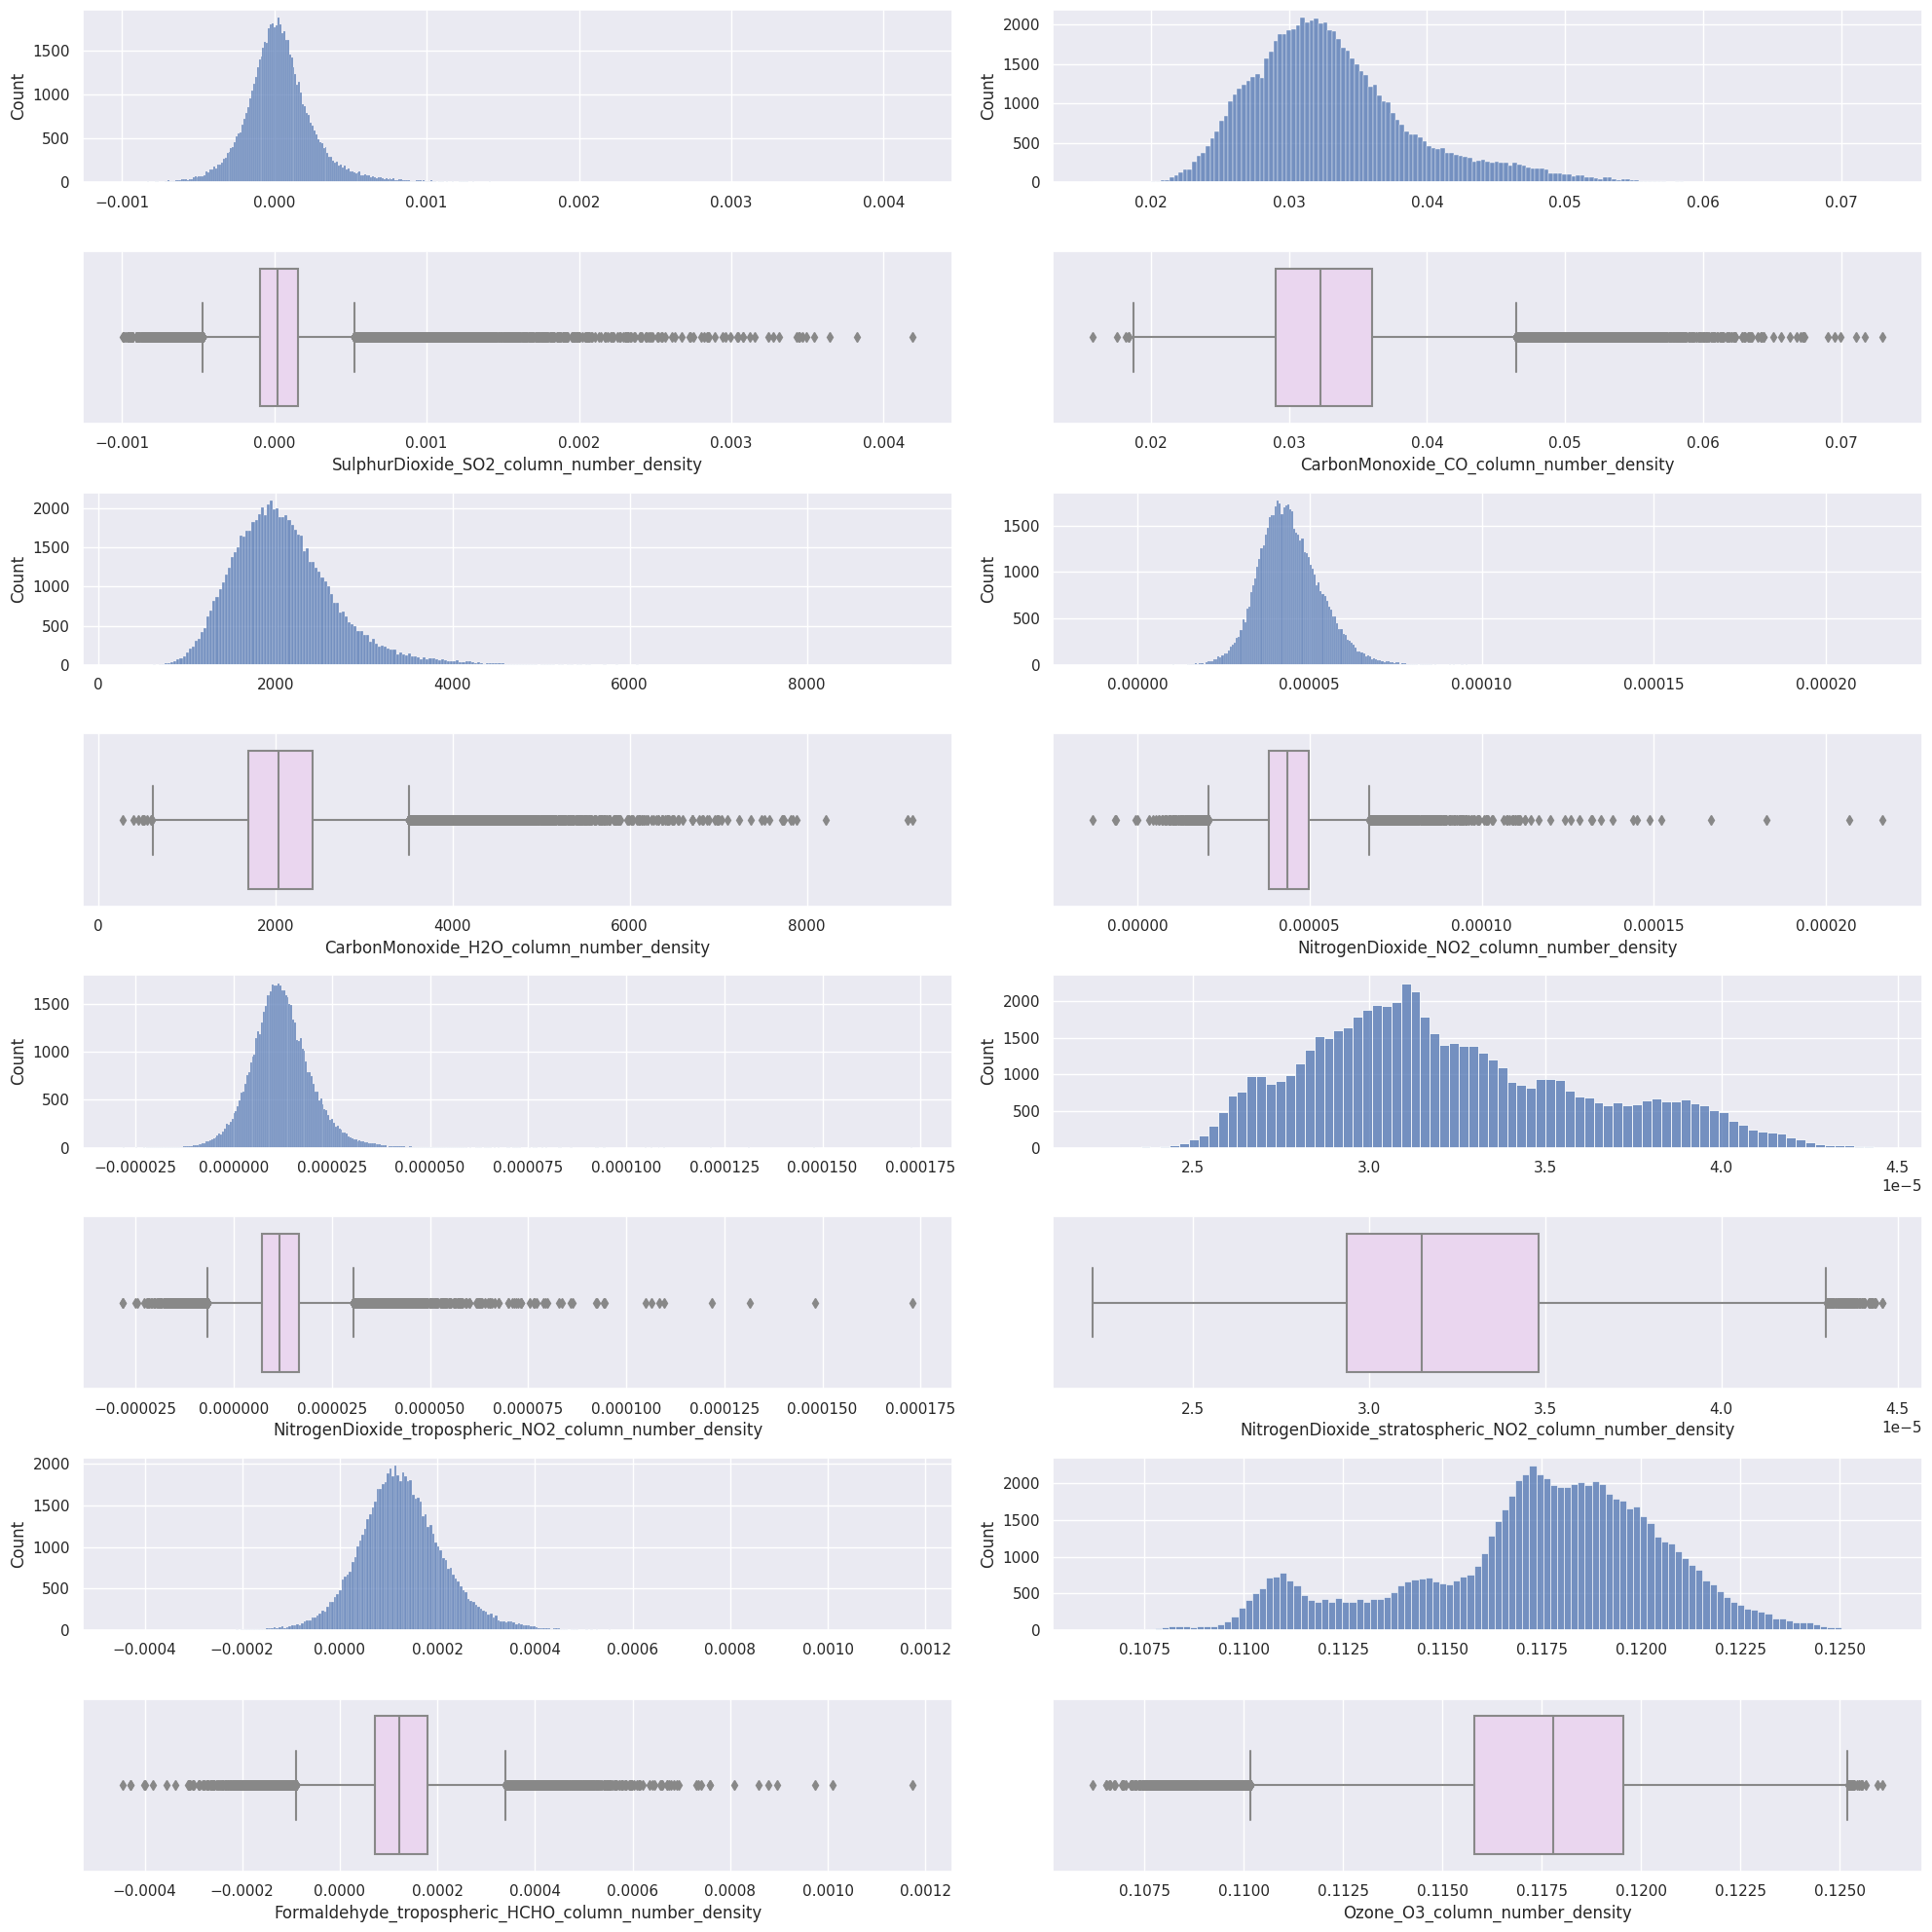

In [15]:
columns = [
    'SulphurDioxide_SO2_column_number_density',
    'CarbonMonoxide_CO_column_number_density',
    'CarbonMonoxide_H2O_column_number_density',
    'NitrogenDioxide_NO2_column_number_density',
    'NitrogenDioxide_tropospheric_NO2_column_number_density',
    'NitrogenDioxide_stratospheric_NO2_column_number_density',
    'Formaldehyde_tropospheric_HCHO_column_number_density',
    'Ozone_O3_column_number_density',
]

sns.set()

fig, axis = plt.subplots(8,2, figsize=(20, 20))

for i, col_name in enumerate(columns):
    if i % 2 == 0 :
        sns.histplot(ax=axis[i, 0], data=train_data[columns], x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i + 1, 0 ], data=train_data[columns], x=col_name, color = '#EDD2F3')
    else :
        sns.histplot(ax=axis[i - 1, 1], data=train_data[columns], x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data=train_data[columns], x=col_name, color = '#EDD2F3')

plt.tight_layout()

plt.show()

We can see that all the Column Number Density measurements are skewed to the left (except Ozone). All the measurements also include a large number of outliers in most cases. The distributions are normal.

### Cloud Fraction Visualization

The percentage of each pixel in satellite imagery or each grid box in a weather or climate model that is covered with clouds.

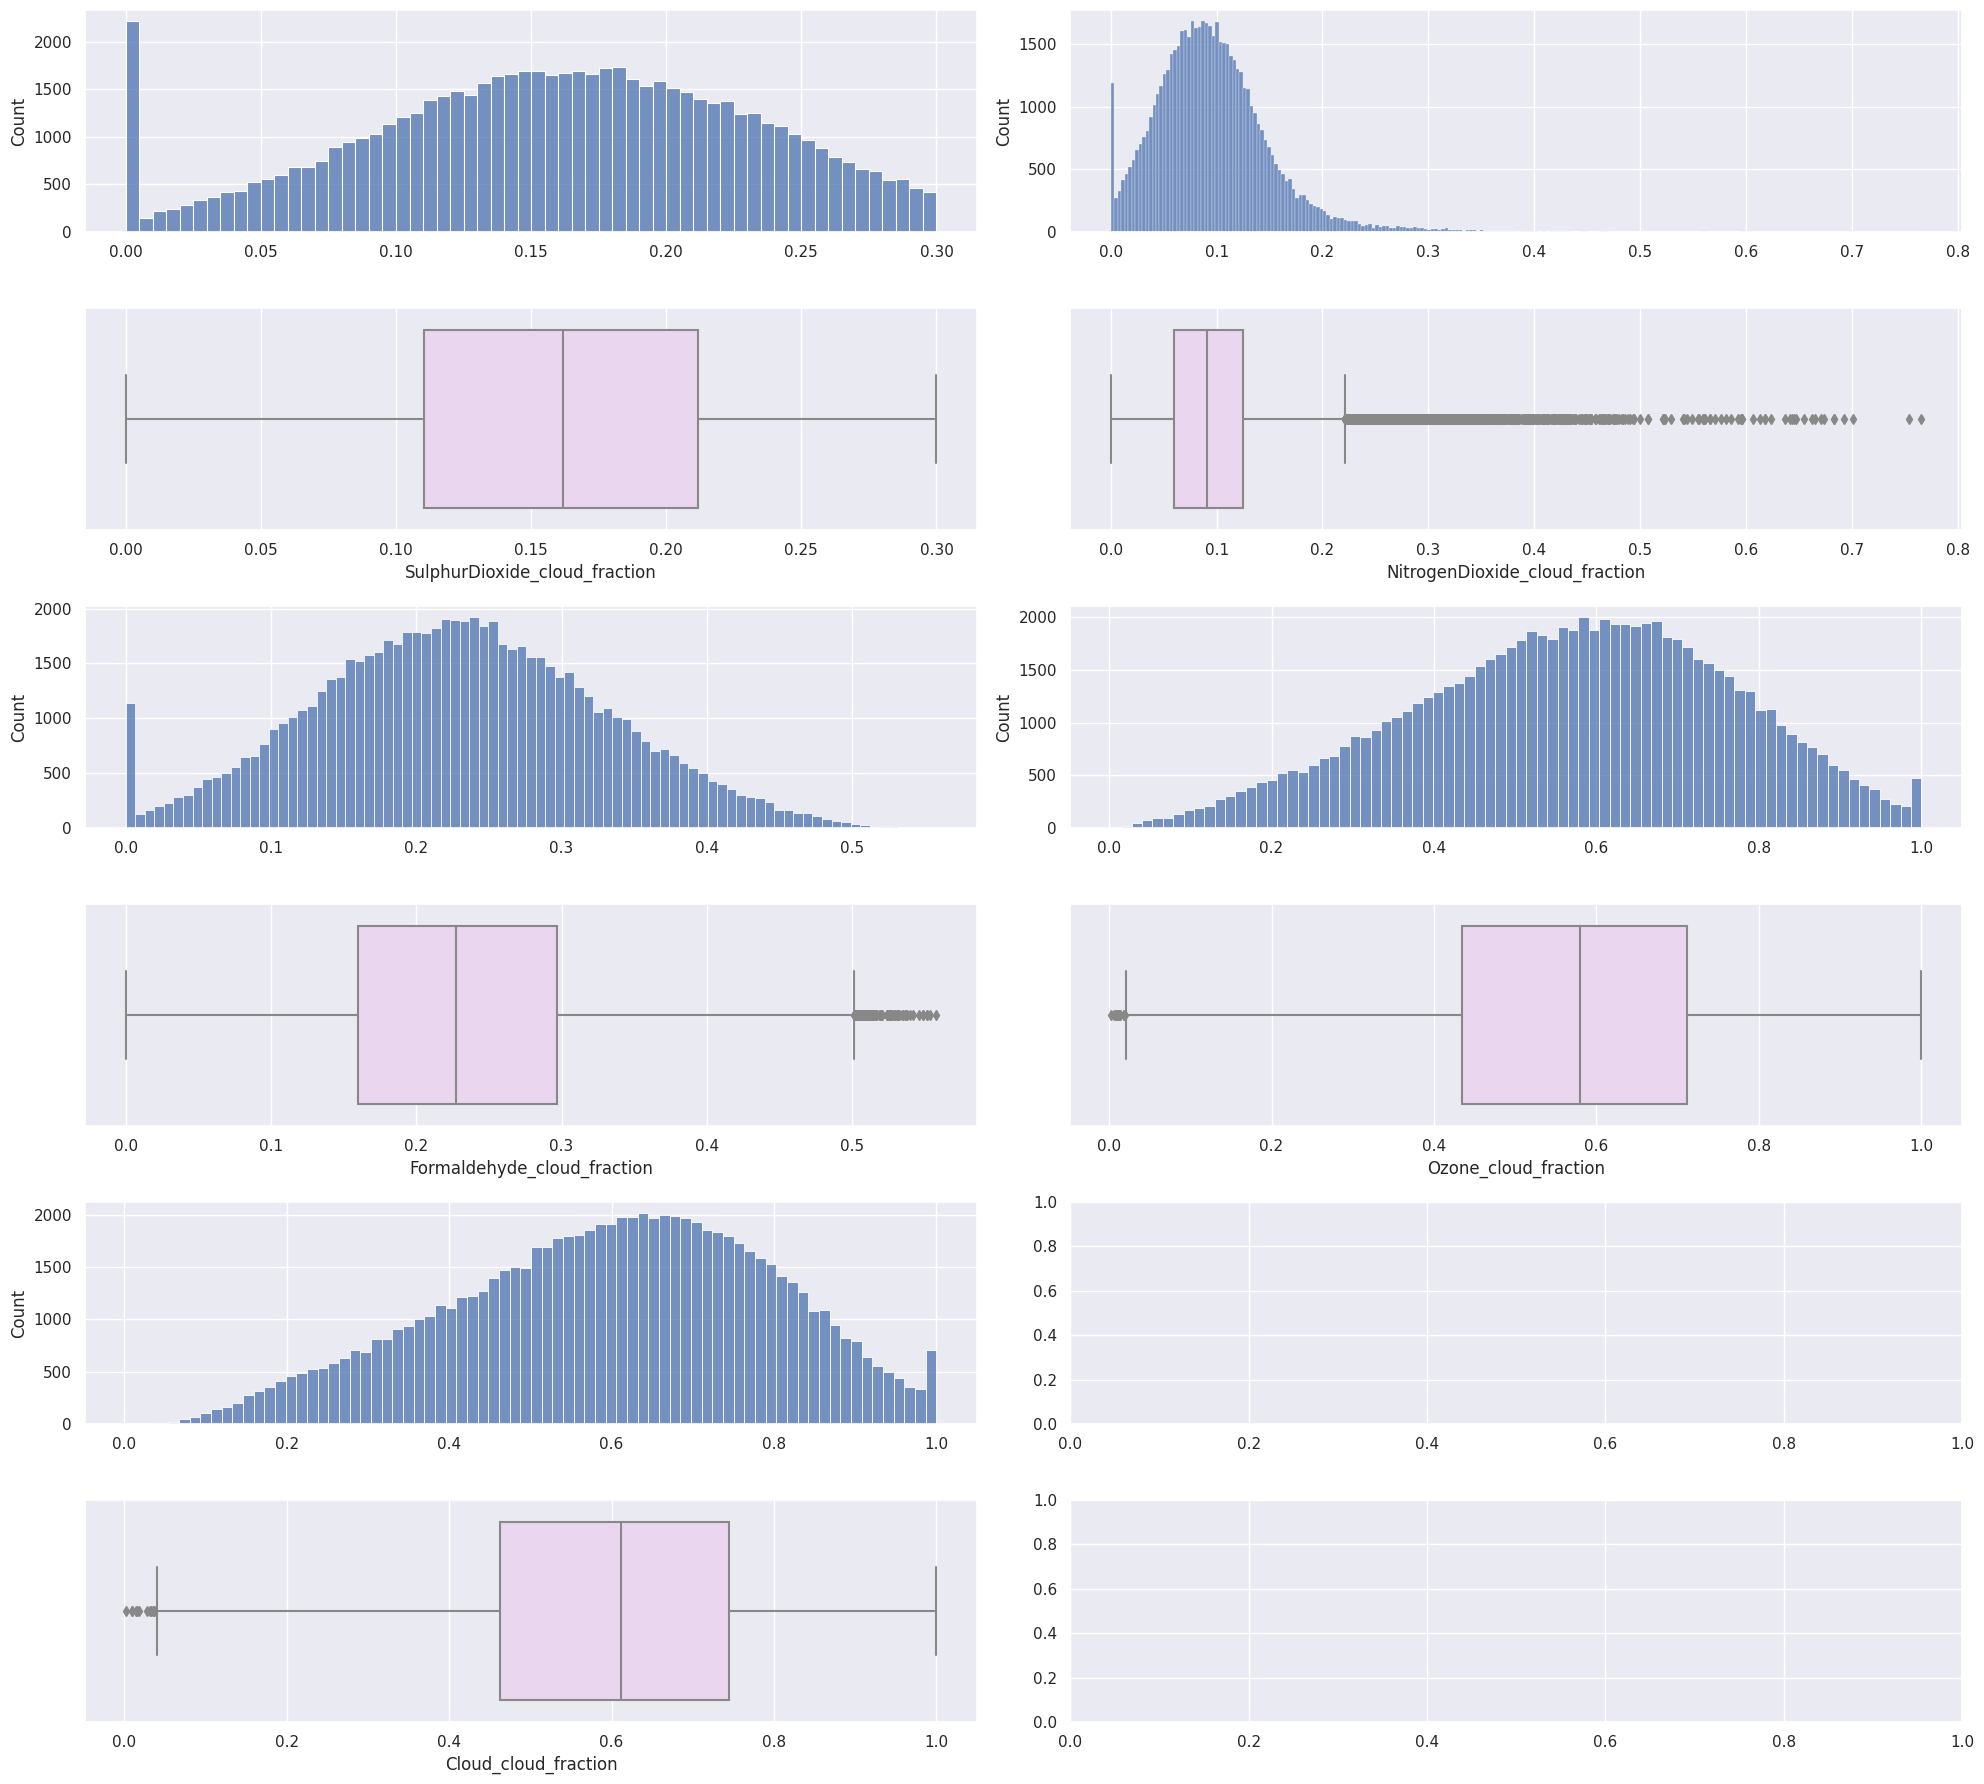

In [16]:
cloud_columns = [
    'SulphurDioxide_cloud_fraction',
    'NitrogenDioxide_cloud_fraction',
    'Formaldehyde_cloud_fraction',
    'Ozone_cloud_fraction',
    'Cloud_cloud_fraction',
]

sns.set()

fig, axis = plt.subplots(6,2, figsize=(20, 18))

for i, col_name in enumerate(cloud_columns):
    if i % 2 == 0 :
        sns.histplot(ax=axis[i, 0], data=train_data[cloud_columns], x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i + 1, 0 ], data=train_data[cloud_columns], x=col_name, color = '#EDD2F3')
    else :
        sns.histplot(ax=axis[i - 1, 1], data=train_data[cloud_columns], x=col_name).set(xlabel=None)
        sns.boxplot(ax=axis[i , 1 ], data=train_data[cloud_columns], x=col_name, color = '#EDD2F3')


plt.tight_layout()

plt.show()

### Univariate Analysis

Visualization of the relationship between CO2 emissions with the main features that contribute to it's output.

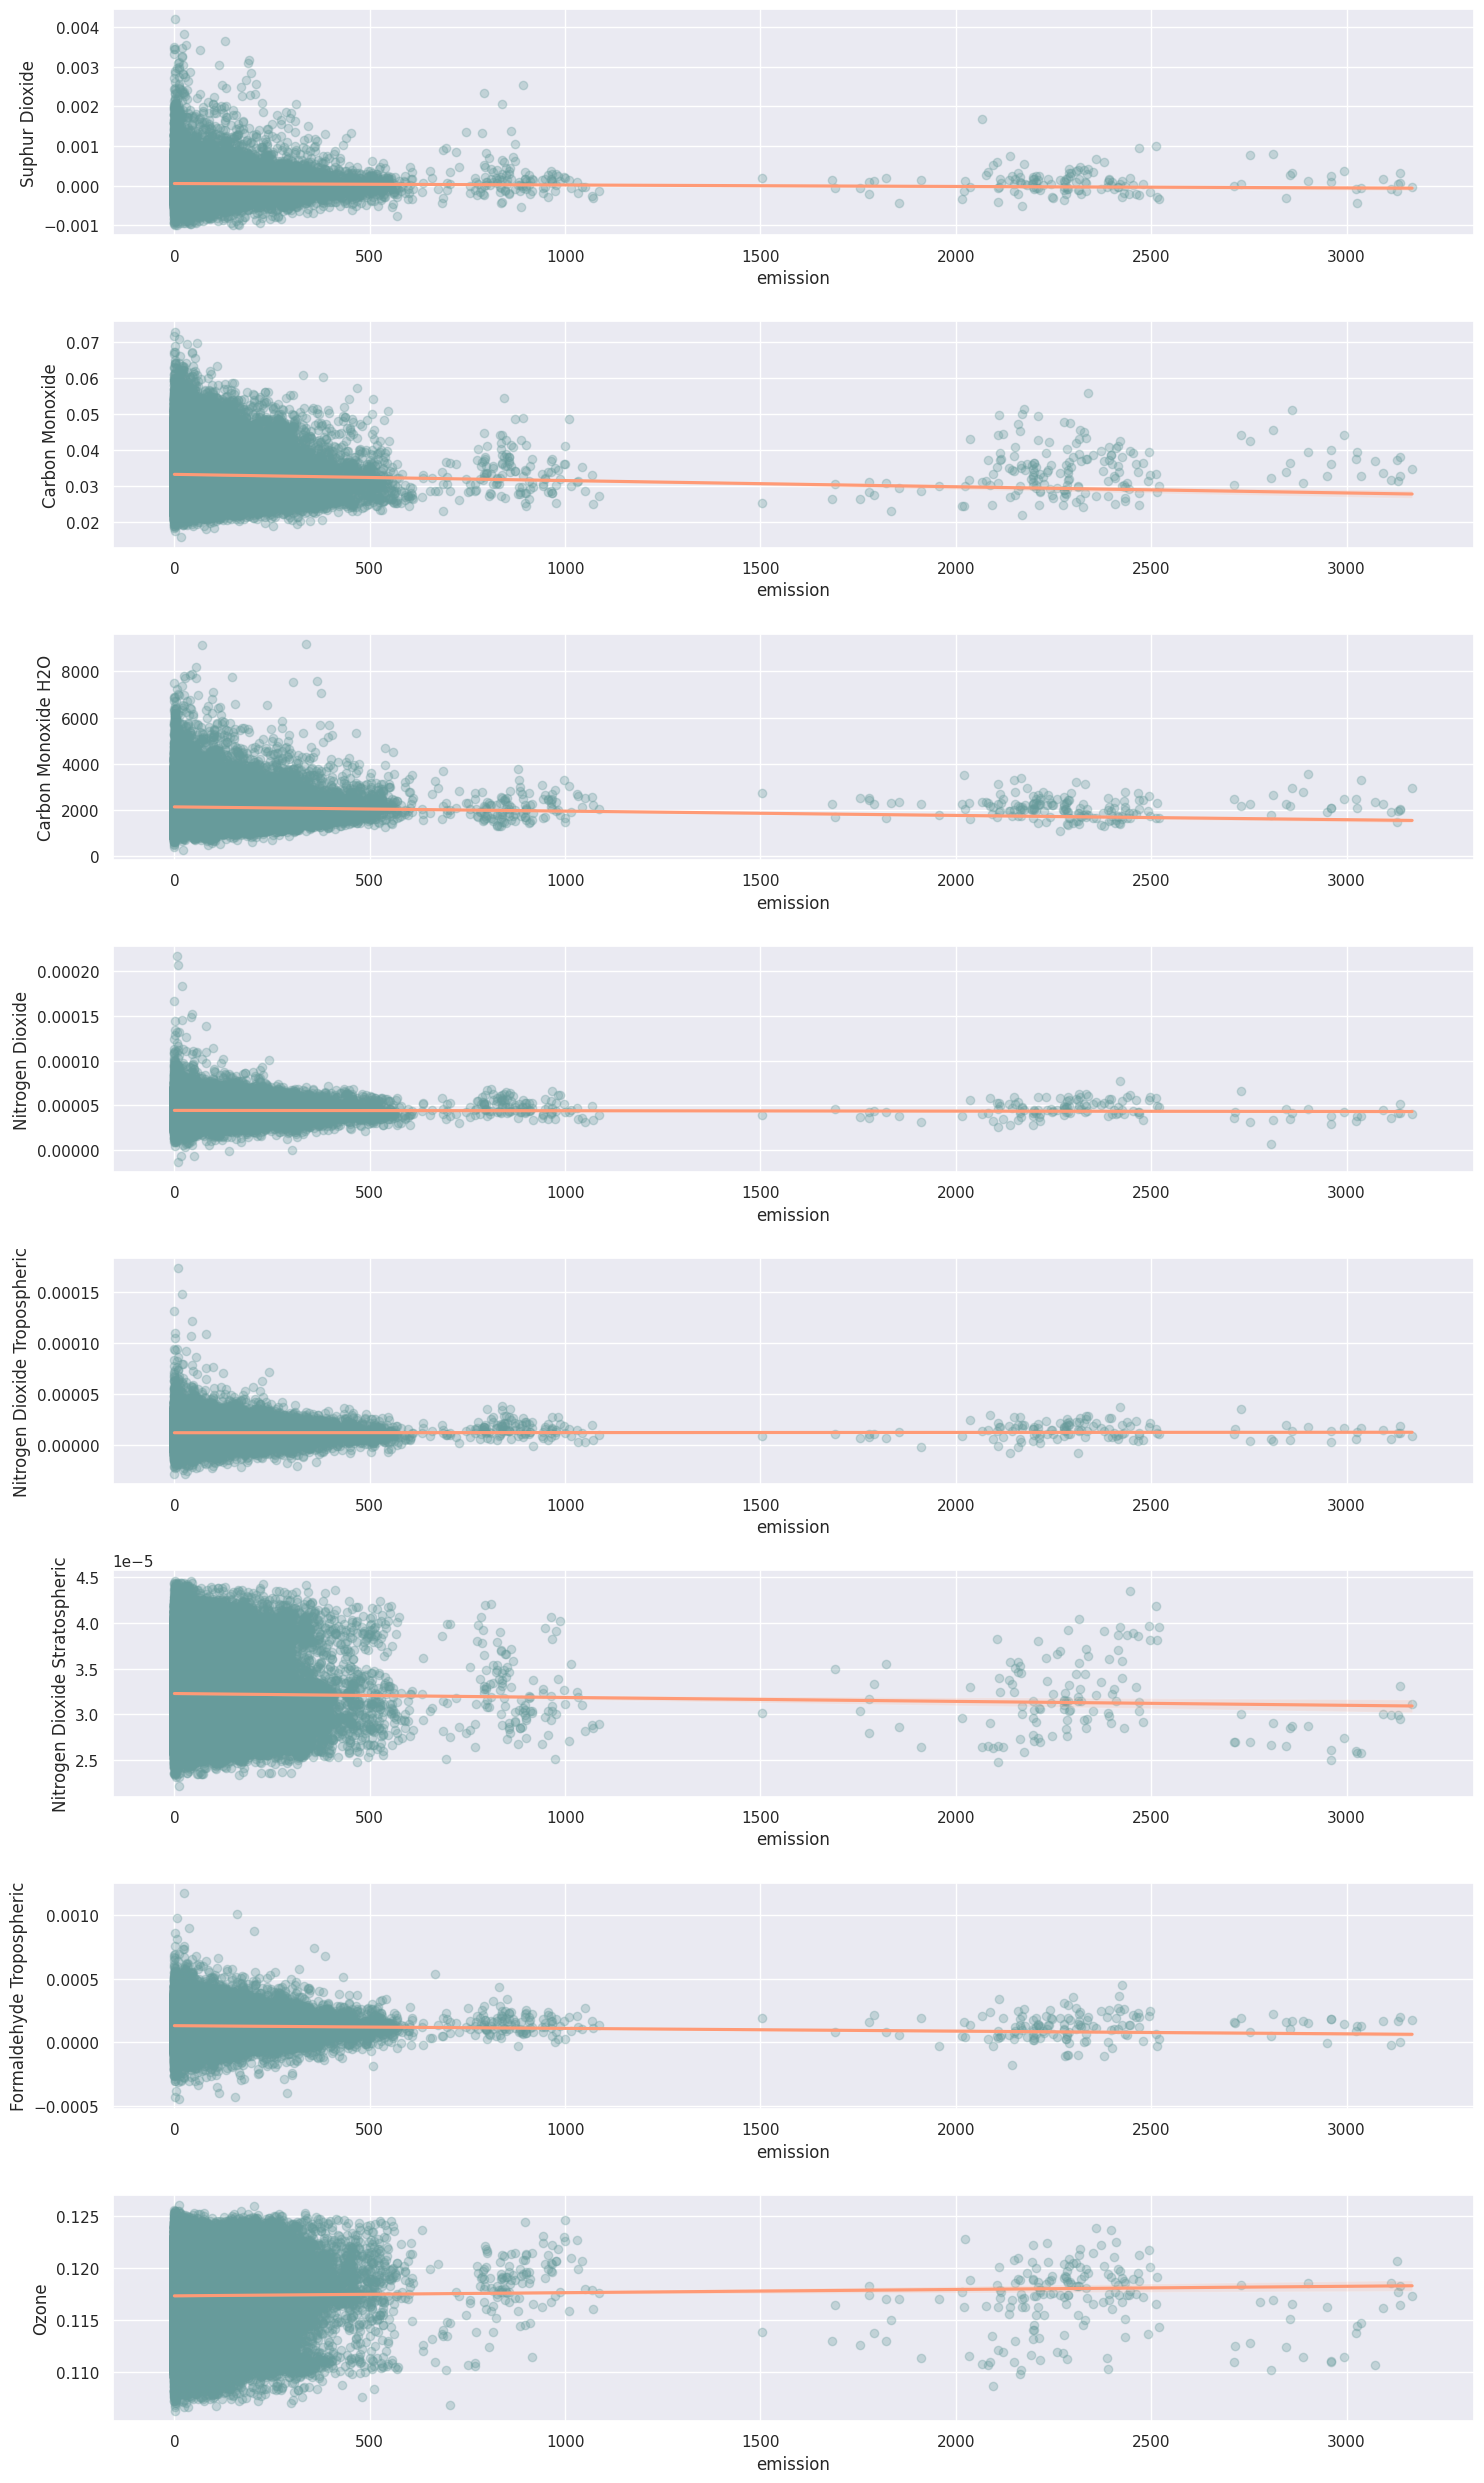

In [17]:

fig, axes = plt.subplots(8, 1, figsize=(15, 25))

sns.regplot(data=train_data, x='emission', y='SulphurDioxide_SO2_column_number_density', ax=axes[0], scatter_kws= {'color': '#679B9B', 'alpha': 0.3}, line_kws = {'color': '#FF9A76'})
axes[0].set_ylabel('Suphur Dioxide')

sns.regplot(data=train_data, x='emission', y='CarbonMonoxide_CO_column_number_density', ax=axes[1], scatter_kws= {'color': '#679B9B', 'alpha': 0.3}, line_kws = {'color': '#FF9A76'})
axes[1].set_ylabel('Carbon Monoxide')

sns.regplot(data=train_data, x='emission', y='CarbonMonoxide_H2O_column_number_density', ax=axes[2], scatter_kws= {'color': '#679B9B', 'alpha': 0.3}, line_kws = {'color': '#FF9A76'})
axes[2].set_ylabel('Carbon Monoxide H2O')

sns.regplot(data=train_data, x='emission', y='NitrogenDioxide_NO2_column_number_density', ax=axes[3], scatter_kws= {'color': '#679B9B', 'alpha': 0.3}, line_kws = {'color': '#FF9A76'})
axes[3].set_ylabel('Nitrogen Dioxide')

sns.regplot(data=train_data, x='emission', y='NitrogenDioxide_tropospheric_NO2_column_number_density', ax=axes[4], scatter_kws= {'color': '#679B9B', 'alpha': 0.3}, line_kws = {'color': '#FF9A76'})
axes[4].set_ylabel('Nitrogen Dioxide Tropospheric')

sns.regplot(data=train_data, x='emission', y='NitrogenDioxide_stratospheric_NO2_column_number_density', ax=axes[5], scatter_kws= {'color': '#679B9B', 'alpha': 0.3}, line_kws = {'color': '#FF9A76'})
axes[5].set_ylabel('Nitrogen Dioxide Stratospheric')

sns.regplot(data=train_data, x='emission', y='Formaldehyde_tropospheric_HCHO_column_number_density', ax=axes[6], scatter_kws= {'color': '#679B9B', 'alpha': 0.3}, line_kws = {'color': '#FF9A76'})
axes[6].set_ylabel('Formaldehyde Tropospheric')

sns.regplot(data=train_data, x='emission', y='Ozone_O3_column_number_density', ax=axes[7], scatter_kws= {'color': '#679B9B', 'alpha': 0.3}, line_kws = {'color': '#FF9A76'})
axes[7].set_ylabel('Ozone')


plt.tight_layout()

plt.show()

### Heatmap

Visualization of the magnitude of each individual value in the dataframe.

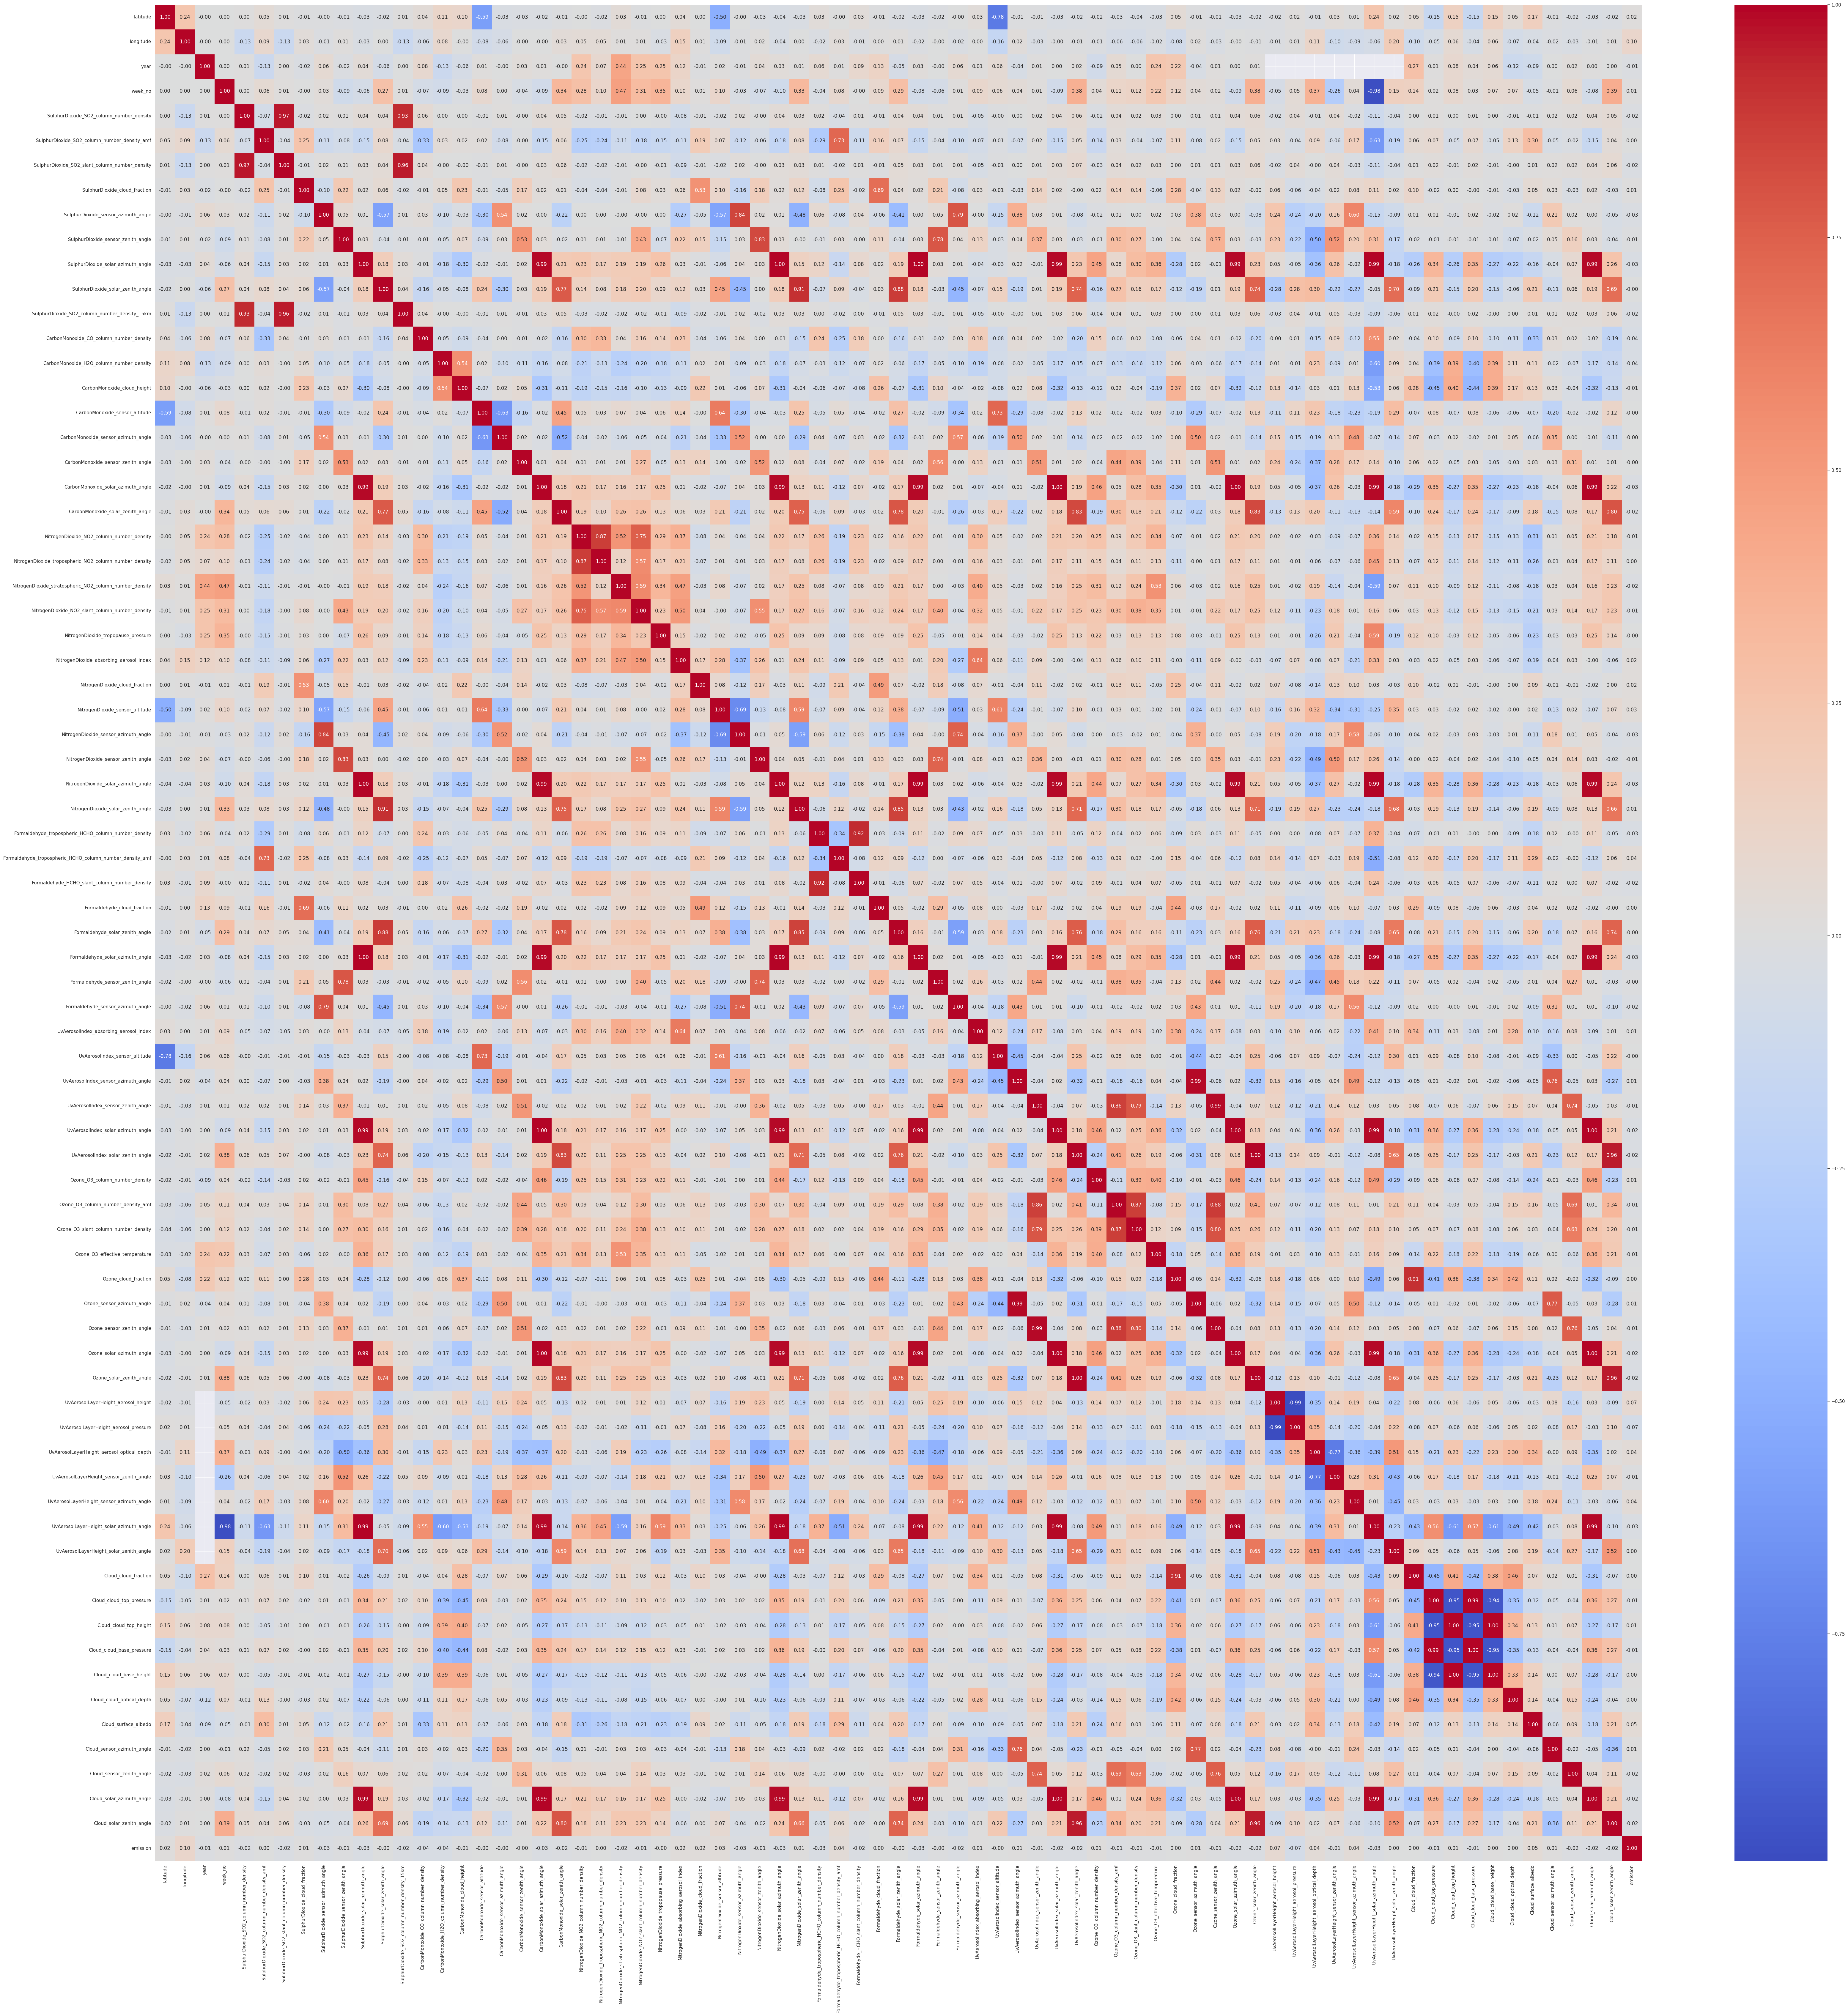

In [18]:
column_to_exclude = 'ID_LAT_LON_YEAR_WEEK'

columns_to_keep = []

for col in train_data.columns:
    if col != column_to_exclude:
        columns_to_keep.append(col)


result_df = train_data[columns_to_keep]

corr_matrix = result_df.corr()


fig, ax = plt.subplots(figsize=(68, 68))  

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

plt.tight_layout()

plt.show()

### Visualization of the areas with worst CO2 emissions

Representation on a map of the places where CO2 emissions were recorded.

In [19]:
from sklearn.metrics.pairwise import haversine_distances

worst_latlon = tuple(full_data[full_data.emission == full_data.emission.max()][['latitude', 'longitude']].iloc[0])
# print(df_train.columns)

def get_dist(X, Y):
    return haversine_distances([(X.latitude, X.longitude), Y])[0,1]

full_data['km_to_worst'] = full_data.apply(lambda x: get_dist(x, worst_latlon), axis=1)* 6371000/1000  # multiply by Earth radius to get kilometers

import geopandas as gpd
from shapely.geometry import Point

params ={
    'geometry': gpd.points_from_xy(full_data.longitude.astype(float), full_data.latitude.astype(float)),
    'crs': 'epsg:4326',  # WGS84
}

gdf_ = gpd.GeoDataFrame(full_data, **params)

gdf_[['geometry', 'emission', 'latitude', 'longitude', 'km_to_worst']].sample(n=1000).explore('km_to_worst', vmin=0, vmax=full_data.km_to_worst.max())

The map shows us that the areas with more CO2 emissions form a belt around the country, with the worst polluters being around lake Kivu.

Karongi is the city where most CO2 emissions were registered.

---

## Model Selection and Training

### Feature Selection

In [20]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

In [21]:
X = full_data.drop('emission', axis = 1)

y = full_data['emission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

selection_model = SelectKBest(f_regression, k = 20)

selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

X_train= pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])

X_test= pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()

longitude    year  SulphurDioxide_sensor_azimuth_angle  \
0     29.198  2021.0                           -11.888113   
1     28.311  2020.0                           -11.888113   
2     29.391  2019.0                            74.229179   
3     30.018  2019.0                           -97.788986   
4     29.826  2022.0                          -102.727463   

   SulphurDioxide_solar_azimuth_angle  \
0                          -77.154091   
1                          -77.154091   
2                          -96.252631   
3                         -124.432022   
4                         -137.119919   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.038016   
1                                 0.029817   
2                                 0.032240   
3                                 0.032019   
4                                 0.030969   

   CarbonMonoxide_solar_azimuth_angle  \
0                         -135.300575   
1                         -129.365606   
2                          -80.879198   
3                         -135.755676   
4                         -137.058624   

   NitrogenDioxide_NO2_column_number_density  \
0                                   0.000045   
1                                   0.000050   
2                                   0.000037   
3                                   0.000034   
4                                   0.000059   

   NitrogenDioxide_stratospheric_NO2_column_number_density  \
0                                           0.000033         
1                                           0.000033         
2                                           0.000032         
3                                           0.000031         
4                                           0.000036         

   NitrogenDioxide_NO2_slant_column_number_density  \
0                                         0.000099   
1                                         0.000128   
2                                         0.000079   
3                                         0.000109   
4                                         0.000103   

   NitrogenDioxide_absorbing_aerosol_index  \
0                                -1.673366   
1                                -1.548097   
2                                -1.513719   
3                                -0.863059   
4                                -1.565167   

   NitrogenDioxide_sensor_azimuth_angle  NitrogenDioxide_solar_azimuth_angle  \
0                            -12.836016                           -78.218006   
1                            -98.585167                          -126.072327   
2                             75.423187                           -94.715499   
3                            -97.788986                          -124.432022   
4                           -102.727463                          -137.119919   

   Formaldehyde_tropospheric_HCHO_column_number_density  \
0                                           0.000084      
1                                           0.000057      
2                                           0.000181      
3                                           0.000145      
4                                           0.000147      

   Formaldehyde_tropospheric_HCHO_column_number_density_amf  \
0                                           1.572017          
1                                           1.924767          
2                                           0.946231          
3                                           1.726322          
4                                           1.078675          

   Formaldehyde_solar_azimuth_angle  Formaldehyde_sensor_azimuth_angle  \
0                       -129.978073                        -100.477531   
1                       -126.072327                         -98.585167   
2                        -96.634721                          74.711820   
3                       -124.432022                         -97.788986   
4               

### Training

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [23]:
print(f"Intercepto (a): {model.intercept_}")
                                            
print(f"Coeficientes (b): {model.coef_}") 

Intercepto (a): 19328.175721354255
Coeficientes (b): [ 1.74727322e+01 -9.83842720e+00 -7.52570135e-04  2.92949092e-03
  2.33529119e+01 -3.87637244e-02  3.20997583e+05 -4.97126308e+05
  1.18539583e+04  1.13980318e+00 -2.33916902e-02 -3.58841828e-02
 -6.04516498e+03  9.12505184e+00  1.06308549e-02  2.91606504e-03
 -4.26144721e+00  4.16104798e-01  1.69034963e+02 -1.31583572e-02]


In [24]:
y_pred = model.predict(X_test)
y_pred

array([ 45.02506176,  76.17650927,  37.85350931, ..., 124.06942954,
        61.37640615,  76.00651179])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred)}") 
                                                                       
print(f"Coefficient of Determination: {r2_score(y_test, y_pred)}") 

Root Mean Squared Error: 15424.231772277693
Coefficient of Determination: 0.06021390762023715


The current model is giving us a high Root Mean Squared Error, which means the model predictions are very different form the actual values. The model is not performing well and it's giving us error. We will have to try a different approach.

### Training with XGBoost

With XGBoost we can enhance the accuracy of our model. 

In [26]:
import xgboost as xgb

regressor = xgb.XGBRegressor(n_estimators = 100, max_depth = 10, random_state = 0) # Here we're creating a model called XGBRegressor from the XGBoost library.
                                                                                   # n_estimators tells the model to do 100 rounds of learning.
                                                                                   # max_depth controls how deep the model goes to understand the data.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error : {rmse}")

Root Mean Squared Error : 23.269401818689797


Adjusting the result we obtained using XGBoost we were able to reduce the RMSE considerabily, from 15424.231772277693 to 23.269401818689797.

In [27]:
print(f"Coefficient of Determination: {r2_score(y_test, y_pred)}")

Coefficient of Determination: 0.9670089673605908


In the same manner, we are getting a much better Coefficient of Determination, closer to 1.

### Training a random sample

In [28]:
random_values = full_data.sample(n = 1000, random_state = 0)


In [29]:
X = random_values.drop('emission', axis = 1)

y = random_values['emission']

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size = 0.2, random_state = 0)

selection_model_rand = SelectKBest(f_regression, k = 20)

selection_model_rand.fit(X_train_rand, y_train_rand)

ix = selection_model.get_support()

X_train_rand = pd.DataFrame(selection_model_rand.transform(X_train_rand), columns = X_train_rand.columns.values[ix])

X_test_rand = pd.DataFrame(selection_model_rand.transform(X_test_rand), columns = X_test_rand.columns.values[ix])

X_train.head()

longitude    year  SulphurDioxide_sensor_azimuth_angle  \
0     29.198  2021.0                           -11.888113   
1     28.311  2020.0                           -11.888113   
2     29.391  2019.0                            74.229179   
3     30.018  2019.0                           -97.788986   
4     29.826  2022.0                          -102.727463   

   SulphurDioxide_solar_azimuth_angle  \
0                          -77.154091   
1                          -77.154091   
2                          -96.252631   
3                         -124.432022   
4                         -137.119919   

   CarbonMonoxide_CO_column_number_density  \
0                                 0.038016   
1                                 0.029817   
2                                 0.032240   
3                                 0.032019   
4                                 0.030969   

   CarbonMonoxide_solar_azimuth_angle  \
0                         -135.300575   
1                         -129.365606   
2                          -80.879198   
3                         -135.755676   
4                         -137.058624   

   NitrogenDioxide_NO2_column_number_density  \
0                                   0.000045   
1                                   0.000050   
2                                   0.000037   
3                                   0.000034   
4                                   0.000059   

   NitrogenDioxide_stratospheric_NO2_column_number_density  \
0                                           0.000033         
1                                           0.000033         
2                                           0.000032         
3                                           0.000031         
4                                           0.000036         

   NitrogenDioxide_NO2_slant_column_number_density  \
0                                         0.000099   
1                                         0.000128   
2                                         0.000079   
3                                         0.000109   
4                                         0.000103   

   NitrogenDioxide_absorbing_aerosol_index  \
0                                -1.673366   
1                                -1.548097   
2                                -1.513719   
3                                -0.863059   
4                                -1.565167   

   NitrogenDioxide_sensor_azimuth_angle  NitrogenDioxide_solar_azimuth_angle  \
0                            -12.836016                           -78.218006   
1                            -98.585167                          -126.072327   
2                             75.423187                           -94.715499   
3                            -97.788986                          -124.432022   
4                           -102.727463                          -137.119919   

   Formaldehyde_tropospheric_HCHO_column_number_density  \
0                                           0.000084      
1                                           0.000057      
2                                           0.000181      
3                                           0.000145      
4                                           0.000147      

   Formaldehyde_tropospheric_HCHO_column_number_density_amf  \
0                                           1.572017          
1                                           1.924767          
2                                           0.946231          
3                                           1.726322          
4                                           1.078675          

   Formaldehyde_solar_azimuth_angle  Formaldehyde_sensor_azimuth_angle  \
0                       -129.978073                        -100.477531   
1                       -126.072327                         -98.585167   
2                        -96.634721                          74.711820   
3                       -124.432022                         -97.788986   
4               

In [30]:
model_rand = LinearRegression()

model_rand.fit(X_train_rand, y_train_rand)

LinearRegression()

In [31]:
print(f"Intercepto (a): {model_rand.intercept_}")
                                            
print(f"Coeficientes (b): {model_rand.coef_}") 

Intercepto (a): 61847.452479169246
Coeficientes (b): [ 2.24504059e+01 -1.41178820e+01  6.59585269e+04 -1.41073392e+04
 -2.21349133e-01 -4.45986874e+04 -4.03185681e-02  3.10593788e-01
  2.88853530e+06 -3.44831740e+05 -3.71449175e-03  2.89843928e+02
  1.76216395e+04 -7.49582564e+04  2.51443764e-02 -1.15489454e+01
 -3.24755302e-01 -2.15851568e+00  7.22895935e+01 -1.46791678e-02]


In [32]:
y_pred_rand = model_rand.predict(X_test_rand)

y_pred_rand

array([ 1.17901781e+02,  3.69795369e+01,  8.53085666e+01,  9.11195238e+01,
        3.92278853e+01,  4.69467729e+01,  3.71749243e+01,  1.40863577e+02,
        1.17696648e+01,  1.32415939e+02,  9.34642465e+01,  5.48045776e+01,
        1.04060130e+02,  7.64601202e+01,  9.41802205e+01,  8.53773195e+01,
        3.89152629e+01,  8.88835306e+01,  5.39910038e+01,  4.29217480e+01,
        8.55332061e+01,  5.62799316e+01,  5.40110070e+01,  1.11759876e+02,
       -3.85576064e+01,  1.17413762e+02,  1.50651357e+02,  1.25889339e+02,
        1.05659129e+02,  6.98722848e+01,  8.78587128e+01,  4.05089505e+01,
        7.64530839e+01,  6.31494177e+01,  5.52727467e+01,  6.52948721e+01,
        5.59532099e+01,  8.35317314e+01,  3.16606077e+01,  6.83816133e+01,
        1.50931914e+02,  4.66459664e+01,  8.18170936e+01,  1.08577971e+02,
        1.30454251e+02,  4.31858765e+01,  6.22025090e+01,  1.27167378e+02,
        1.05775118e+02,  1.42388815e+02,  1.24736107e+02,  8.13773353e+01,
        3.61462079e+01,  

In [33]:
print(f"Root Mean Squared Error: {mean_squared_error(y_test_rand, y_pred_rand)}") 
                                                                       
print(f"Coefficient of Determination: {r2_score(y_test_rand, y_pred_rand)}") 

Root Mean Squared Error: 4570.230126809415
Coefficient of Determination: -0.29952806358518824


In [34]:
reg = xgb.XGBRegressor(n_estimators = 100, max_depth = 10, random_state = 0)
reg.fit(X_train_rand, y_train_rand)
y_pred = reg.predict(X_test_rand)

rmse = np.sqrt(mean_squared_error(y_test_rand, y_pred_rand))
print(f"Root Mean Squared Error : {rmse}")

Root Mean Squared Error : 67.60347717987156


Adjusting the result we obtained using XGBoost we were able to reduce the RMSE considerabily, from 4570.230126809415 to 67.60347717987156.

In [35]:
print(f"Coefficient of Determination: {r2_score(y_test_rand, y_pred_rand)}")

Coefficient of Determination: -0.29952806358518824


However, we are still getting a terrible Coefficient of Determination.

### Substracting the result of the Sample training with the Original training (without XGBoost)

In [36]:
original_training = 15424.231772277693
sample_training = 5690.805691683844
print('Original Root Mean Squared Error: 15424.231772277693')
print( 'Root Mean Squared Error for the sample: 5690.805691683844')

result = original_training - sample_training

print(f'New Root Mean Squared Error : {result}')

Original Root Mean Squared Error: 15424.231772277693
Root Mean Squared Error for the sample: 5690.805691683844
New Root Mean Squared Error : 9733.42608059385


###  Saving the best model

The best model is the one enhanced with XGBoost, so it'll be the one we save.

In [37]:
# from pickle import dump

# dump(model, open("rwanda-co2-emissions.sav", "wb"))

In [38]:
from pickle import dump

dump(regressor, open("rwanda-co2-emissions-xgboost.sav", 'wb'))